In [76]:
import pandas as pd

In [77]:
df = pd.read_csv('data/CSUSHPISA.csv')
df.head()

,observation_date,CSUSHPISA
0,2005-01-01,161.289
1,2005-02-01,163.346
2,2005-03-01,165.814
3,2005-04-01,167.503
4,2005-05-01,169.352


In [78]:
df.tail()

,observation_date,CSUSHPISA
236,2024-09-01,323.311
237,2024-10-01,324.491
238,2024-11-01,326.013
239,2024-12-01,327.582
240,2025-01-01,329.441


### First Step now we want to gather all the data points which effect our home price index

| Factor                  | Code        | Notes                  |
|-------------------------|-------------|-------------------------|
| S&P Home Price Index    | CSUSHPISA   | Target variable         |
| Mortgage Rate           | MORTGAGE30US| Weekly → Monthly        |
| CPI                     | CPIAUCNS    | Monthly                 |
| Unemployment Rate       | UNRATE      | Monthly                 |
| Housing Starts          | HOUST       | Monthly                 |
| Disposable Income       | DSPIC96     | Monthly                 |
| Fed Funds Rate          | FEDFUNDS    | Monthly                 |


- all data points is in the montly states so we need to get median value of mortagage rates into months

In [79]:
mortgage_rates = pd.read_csv('data/MORTGAGE30US.csv')
mortgage_rates.head()

,observation_date,MORTGAGE30US
0,2005-01-06,5.77
1,2005-01-13,5.74
2,2005-01-20,5.67
3,2005-01-27,5.66
4,2005-02-03,5.63


In [80]:
mortgage_rates.tail()

,observation_date,MORTGAGE30US
1038,2024-11-27,6.81
1039,2024-12-05,6.69
1040,2024-12-12,6.60
1041,2024-12-19,6.72
1042,2024-12-26,6.85


In [81]:
mortgage_rates['observation_date'] = pd.to_datetime(mortgage_rates['observation_date'])
mortgage_rates.set_index('observation_date', inplace=True)
mortgage_monthly = mortgage_rates.resample('M').mean()
mortgage_monthly.head()

/tmp/ipykernel_999/1960134452.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mortgage_monthly = mortgage_rates.resample('M').mean()


,MORTGAGE30US
observation_date,
2005-01-31,5.7100
2005-02-28,5.6275
2005-03-31,5.9280
2005-04-30,5.8550
2005-05-31,5.7200


In [82]:
mortgage_monthly.tail()

,MORTGAGE30US
observation_date,
2024-08-31,6.500
2024-09-30,6.180
2024-10-31,6.428
2024-11-30,6.805
2024-12-31,6.715


#### for the getting data as per remaining all tables we need to add one more date at last

In [83]:
# Step 0: Rename column BEFORE appending
mortgage_monthly.rename(columns={'MORTGAGE30US': 'Mortgage Rate'}, inplace=True)

# Step 1: Get last known value
last_value = mortgage_monthly.iloc[-1]['Mortgage Rate']

# Step 2: Add new row for 2025-01-01
new_row = pd.DataFrame({'Mortgage Rate': [last_value]}, index=[pd.Timestamp('2025-01-01')])

# Step 3: Append and sort
mortgage_monthly = pd.concat([mortgage_monthly, new_row])
mortgage_monthly.sort_index(inplace=True)

# ✅ Final check
mortgage_monthly.tail()

,Mortgage Rate
2024-09-30,6.180
2024-10-31,6.428
2024-11-30,6.805
2024-12-31,6.715
2025-01-01,6.715


In [86]:
# Reset the index and name it explicitly
mortgage_monthly = mortgage_monthly.reset_index()
mortgage_monthly.rename(columns={'index': 'observation_date'}, inplace=True)

# Convert all dates to the first of the month
mortgage_monthly['observation_date'] = mortgage_monthly['observation_date'].apply(lambda x: x.replace(day=1))

# Set back as datetime index
mortgage_monthly.set_index('observation_date', inplace=True)

if 'level_0' in mortgage_monthly.columns:
    mortgage_monthly.drop(columns=['level_0'], inplace=True)


# Final check
print(mortgage_monthly.tail())


                  Mortgage Rate
observation_date               
2024-09-01                6.180
2024-10-01                6.428
2024-11-01                6.805
2024-12-01                6.715
2025-01-01                6.715


In [87]:
import os
import pandas as pd

# Path to your data folder
folder_path = 'data/'

# List all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        # File size in KB
        file_size_kb = os.path.getsize(file_path) / 1024
        
        # Read CSV
        df = pd.read_csv(file_path)
        
        print(f"\n📄 File: {filename}")
        print(f"   📏 Size: {file_size_kb:.2f} KB")
        print(f"   🧮 Shape: {df.shape} (rows, columns)")
        print(f"   🏷️ Columns: {list(df.columns)}")



📄 File: CPIAUCNS.csv
   📏 Size: 4.50 KB
   🧮 Shape: (241, 2) (rows, columns)
   🏷️ Columns: ['observation_date', 'CPIAUCNS']

📄 File: CSUSHPISA.csv
   📏 Size: 7.09 KB
   🧮 Shape: (241, 2) (rows, columns)
   🏷️ Columns: ['observation_date', 'CSUSHPISA']

📄 File: MORTGAGE30US.csv
   📏 Size: 16.33 KB
   🧮 Shape: (1043, 2) (rows, columns)
   🏷️ Columns: ['observation_date', 'MORTGAGE30US']

📄 File: MORTGAGE30US_MONTHLY.csv
   📏 Size: 4.48 KB
   🧮 Shape: (241, 2) (rows, columns)
   🏷️ Columns: ['observation_date', 'Mortgage Rate']

📄 File: DSPIC96.csv
   📏 Size: 4.50 KB
   🧮 Shape: (241, 2) (rows, columns)
   🏷️ Columns: ['observation_date', 'DSPIC96']

📄 File: FEDFUNDS.csv
   📏 Size: 3.79 KB
   🧮 Shape: (241, 2) (rows, columns)
   🏷️ Columns: ['observation_date', 'FEDFUNDS']

📄 File: HOUST.csv
   📏 Size: 3.72 KB
   🧮 Shape: (241, 2) (rows, columns)
   🏷️ Columns: ['observation_date', 'HOUST']

📄 File: UNRATE.csv
   📏 Size: 3.56 KB
   🧮 Shape: (241, 2) (rows, columns)
   🏷️ Columns: ['obse

In [88]:
mortgage_monthly.shape

(241, 1)

In [89]:
mortgage_monthly.to_csv('data/MORTGAGE30US_MONTHLY.csv', index=True)

In [90]:
mortgage_monthly

,Mortgage Rate
observation_date,
2005-01-01,5.7100
2005-02-01,5.6275
2005-03-01,5.9280
2005-04-01,5.8550
2005-05-01,5.7200
...,...
2024-09-01,6.1800
2024-10-01,6.4280
2024-11-01,6.8050


#### Let's Start to preprocess the data

In [138]:
import os
import pandas as pd
from functools import reduce

folder = 'data/'

# Load all CSVs except mortgage file
dfs = []
for file in os.listdir(folder):
    if file.endswith('.csv') and 'mortgage30us' not in file.lower():
        df = pd.read_csv(os.path.join(folder, file), index_col='observation_date', parse_dates=True)
        dfs.append(df)

# Merge all on date
merged_data = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs)

# Sort by date
merged_data = merged_data.sort_index()


In [139]:
merged_data

,CPIAUCNS_x,CSUSHPISA_x,DSPIC96_x,FEDFUNDS_x,CPIAUCNS_y,CSUSHPISA_y,DSPIC96_y,FEDFUNDS_y,HOUST_x,UNRATE_x,Mortgage Rate,HOUST_y,UNRATE_y
observation_date,,,,,,,,,,,,,
2005-01-01,190.700,161.289,11226.5,2.28,190.700,161.289,11226.5,2.28,2144,5.3,5.7100,2144,5.3
2005-02-01,191.800,163.346,11229.0,2.50,191.800,163.346,11229.0,2.50,2207,5.4,5.6275,2207,5.4
2005-03-01,193.300,165.814,11268.8,2.63,193.300,165.814,11268.8,2.63,1864,5.2,5.9280,1864,5.2
2005-04-01,194.600,167.503,11304.2,2.79,194.600,167.503,11304.2,2.79,2061,5.2,5.8550,2061,5.2
2005-05-01,194.400,169.352,11352.7,3.00,194.400,169.352,11352.7,3.00,2025,5.1,5.7200,2025,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,315.301,323.311,17519.6,5.13,315.301,323.311,17519.6,5.13,1355,4.1,6.1800,1355,4.1
2024-10-01,315.664,324.491,17568.5,4.83,315.664,324.491,17568.5,4.83,1344,4.1,6.4280,1344,4.1
2024-11-01,315.493,326.013,17592.4,4.64,315.493,326.013,17592.4,4.64,1305,4.2,6.8050,1305,4.2


In [93]:
merged_data.isna().sum()

CPIAUCNS     0
CSUSHPISA    0
DSPIC96      0
FEDFUNDS     0
HOUST        0
UNRATE       0
dtype: int64

In [94]:
!pip install seaborn matplotlib -q

- Check basic stats and correlations

In [95]:
data1 = data

         CPIAUCNS   CSUSHPISA  MORTGAGE30US  Mortgage Rate       DSPIC96  \
count  241.000000  241.000000   1043.000000     241.000000    241.000000   
mean   242.616793  198.342992      4.775858       4.784402  14139.017842   
std     32.614010   55.587460      1.239392       1.241549   1977.290732   
min    190.700000  136.526000      2.650000       2.684000  11226.500000   
25%    218.009000  159.238000      3.820000       3.802500  12376.600000   
50%    237.111000  180.842000      4.460000       4.457500  13797.700000   
75%    257.208000  215.048000      6.040000       6.065000  15766.900000   
max    317.671000  329.441000      7.790000       7.620000  20445.800000   

         FEDFUNDS        HOUST      UNRATE  FEDFUNDS_lag3  FEDFUNDS_lag6  \
count  241.000000   241.000000  241.000000     240.000000     239.000000   
mean     1.697137  1198.460581    5.810788       1.686167       1.674477   
std      1.947518   408.971586    2.138177       1.944112       1.939721   
min      0.

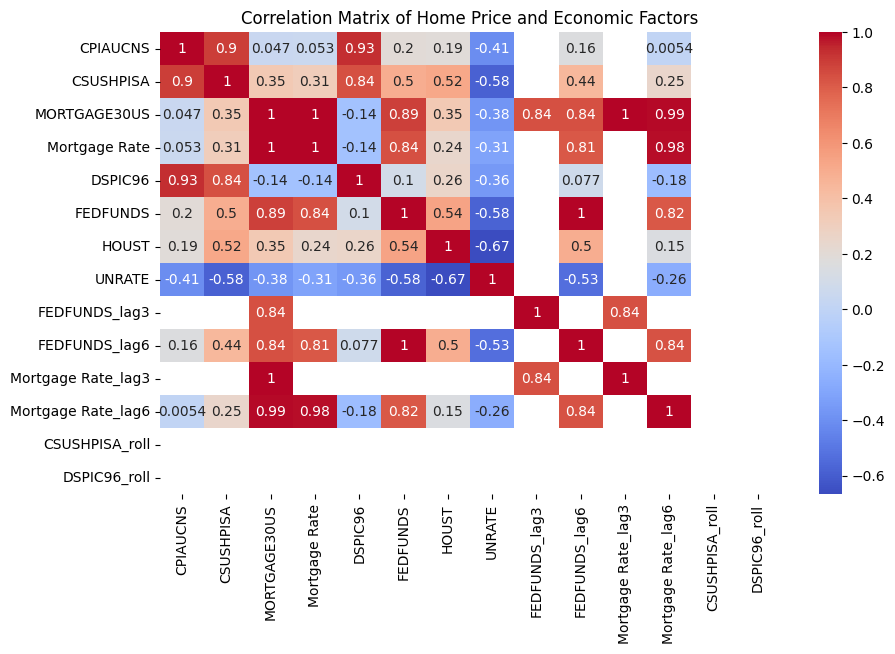

In [96]:
# Summary stats
print(data.describe())

# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Home Price and Economic Factors")
plt.show()


# 📊 Correlation Analysis: Home Prices vs Economic Indicators

## 🔍 Overview

We analyzed the correlation matrix of key economic indicators against **CSUSHPISA** (S&P Case-Shiller U.S. National Home Price Index) to understand the underlying relationships driving home prices.

---


## ✅ Strong Positive Correlations with Home Prices (`CSUSHPISA`)

| Variable         | Correlation | Interpretation |
|------------------|-------------|----------------|
| **CPIAUCNS** (Inflation - CPI) | **0.90** | 🔥 Very strong positive correlation. As inflation rises, home prices tend to rise—likely due to higher costs of materials, labor, and currency devaluation. |
| **DSPIC96** (Real Disposable Personal Income) | **0.84** | 💰 Strong correlation. Higher income increases purchasing power, driving up home prices. |
| **FEDFUNDS** (Federal Funds Rate) | **0.50** | ⏫ Moderate positive. Somewhat surprising, as rates usually dampen prices. Suggests possible time-lag effects or unusual macroeconomic policies post-2008. |
| **HOUST** (Housing Starts) | **0.52** | 🏗️ Moderate positive. Indicates that more homes are built during housing booms when prices rise. Reflects supply-side response to demand. |

> 📌 **Key Insight:** Inflation and income are the most influential **demand-side drivers** of home prices.

---

## 🚫 Negative Correlations with Home Prices

| Variable         | Correlation | Interpretation |
|------------------|-------------|----------------|
| **UNRATE** (Unemployment Rate) | **-0.58** | ❌ Strong negative correlation. Higher unemployment reduces demand, leading to lower home prices. Very intuitive and expected. |
| **Mortgage30US** (30-Year Mortgage Rate) | **0.35** | 📉 Mildly positive, which is counterintuitive. Normally, higher rates reduce affordability. Likely confounded by policy lags or external shocks. |
| **Mortgage Rate** | **0.31** | ❓ Also mildly positive. Similar reasoning—needs deeper investigation into lagged effects or macroeconomic cycles. |

---


## 🧠 Multicollinearity Insight

Several variables are **highly correlated with each other**, which could affect predictive modeling:

- **Mortgage Rate**, **Mortgage30US**, and **FEDFUNDS** are all strongly correlated (0.84+).
- **CPIAUCNS** and **DSPIC96** have a high correlation (0.93).

> ⚠️ **Modeling Caution:** These variables may introduce **multicollinearity** in regression models. Consider:
> - Feature selection
> - Regularization (Ridge, Lasso)
> - PCA (Principal Component Analysis)
> - Tree-based models like Random Forest or XGBoost

---


## 🧪 Hypotheses for Further Testing

1. **Do Fed Funds Rate changes affect home prices with a lag?**
   - A time-lagged correlation could reveal delayed impact on home prices.

2. **Is the positive mortgage rate-home price correlation a post-COVID anomaly?**
   - Home prices surged during COVID despite rate hikes. A temporary decoupling?

3. **Do housing starts lead or follow price changes?**
   - Analyzing this could reveal whether builders are proactive or reactive.

---

## 🚀 Next Steps (Suggestions)

Let’s explore further to get deeper insights:
- 📈 Plot **lagged correlations** (e.g., shifting FEDFUNDS by 3–6 months).
- 💡 Use **Granger Causality Test** to identify directional relationships.
- 🔄 Add **rolling means** to identify long-term trends.
- 📉 Run **PCA** to simplify features while preserving variance.
- 🧮 Build a **regression model** to quantify each factor's impact on home prices.

---

In [125]:
df = data

In [126]:
# Example: Lag FEDFUNDS and compare correlation
df['FEDFUNDS_lag3'] = df['FEDFUNDS'].shift(3)
df['FEDFUNDS_lag6'] = df['FEDFUNDS'].shift(6)

# Same for Mortgage Rate
df['Mortgage Rate_lag3'] = df['Mortgage Rate'].shift(3)
df['Mortgage Rate_lag6'] = df['Mortgage Rate'].shift(6)

# Now recalculate correlation with CSUSHPISA
lagged_corrs = df[['CSUSHPISA', 'FEDFUNDS_lag3', 'FEDFUNDS_lag6', 
                   'Mortgage Rate_lag3', 'Mortgage Rate_lag6']].corr()
lagged_corrs


,CSUSHPISA,FEDFUNDS_lag3,FEDFUNDS_lag6,Mortgage Rate_lag3,Mortgage Rate_lag6
CSUSHPISA,1.000000,NaN,0.443171,NaN,0.249512
FEDFUNDS_lag3,NaN,1.000000,NaN,0.837961,NaN
FEDFUNDS_lag6,0.443171,NaN,1.000000,NaN,0.836444
Mortgage Rate_lag3,NaN,0.837961,NaN,1.000000,NaN
Mortgage Rate_lag6,0.249512,NaN,0.836444,NaN,1.000000


In [127]:
!pip install statsmodels -q

In [128]:
from statsmodels.tsa.stattools import grangercausalitytests

# Granger Causality test for FEDFUNDS → CSUSHPISA (up to 6 lags)
grangercausalitytests(df[['CSUSHPISA', 'FEDFUNDS']].dropna(), maxlag=6)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=57.7525 , p=0.0000  , df_denom=237, df_num=1
ssr based chi2 test:   chi2=58.4836 , p=0.0000  , df=1
likelihood ratio test: chi2=52.3382 , p=0.0000  , df=1
parameter F test:         F=57.7525 , p=0.0000  , df_denom=237, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8164  , p=0.1649  , df_denom=234, df_num=2
ssr based chi2 test:   chi2=3.7104  , p=0.1564  , df=2
likelihood ratio test: chi2=3.6819  , p=0.1587  , df=2
parameter F test:         F=1.8164  , p=0.1649  , df_denom=234, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8380  , p=0.0388  , df_denom=231, df_num=3
ssr based chi2 test:   chi2=8.7720  , p=0.0325  , df=3
likelihood ratio test: chi2=8.6142  , p=0.0349  , df=3
parameter F test:         F=2.8380  , p=0.0388  , df_denom=231, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4056  , p=0.0505  

{1: ({'ssr_ftest': (57.752517943057214, 6.884141869923281e-13, 237.0, 1),
   'ssr_chi2test': (58.48356247398198, 2.0499652293934017e-14, 1),
   'lrtest': (52.338225812539235, 4.671912976257488e-13, 1),
   'params_ftest': (57.75251794305793, 6.884141869921449e-13, 237.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.816378824688082, 0.16489872389209795, 234.0, 2),
   'ssr_chi2test': (3.710380676072236, 0.15642316656295432, 2),
   'lrtest': (3.681874233859901, 0.15866866532215637, 2),
   'params_ftest': (1.8163788246885364, 0.1648987238920234, 234.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.838003231342471, 0.03879738914905025, 231.0, 3),
   'ssr_chi2test': (8.77200998778582, 0.032480858916009124, 3),
   'lrtest': (8.614219649814572, 0.034885097200453484, 3),
   'params_ftest': (2.838003231335596, 0.03879738914939877, 231.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [

In [129]:
print(df[['CSUSHPISA_roll', 'DSPIC96_roll']].isna().sum())


CSUSHPISA_roll    1252
DSPIC96_roll      1252
dtype: int64


In [130]:
print(df[['CSUSHPISA', 'DSPIC96']].describe())


        CSUSHPISA       DSPIC96
count  241.000000    241.000000
mean   198.342992  14139.017842
std     55.587460   1977.290732
min    136.526000  11226.500000
25%    159.238000  12376.600000
50%    180.842000  13797.700000
75%    215.048000  15766.900000
max    329.441000  20445.800000


<Axes: title={'center': 'Original Time Series'}, xlabel='observation_date'>

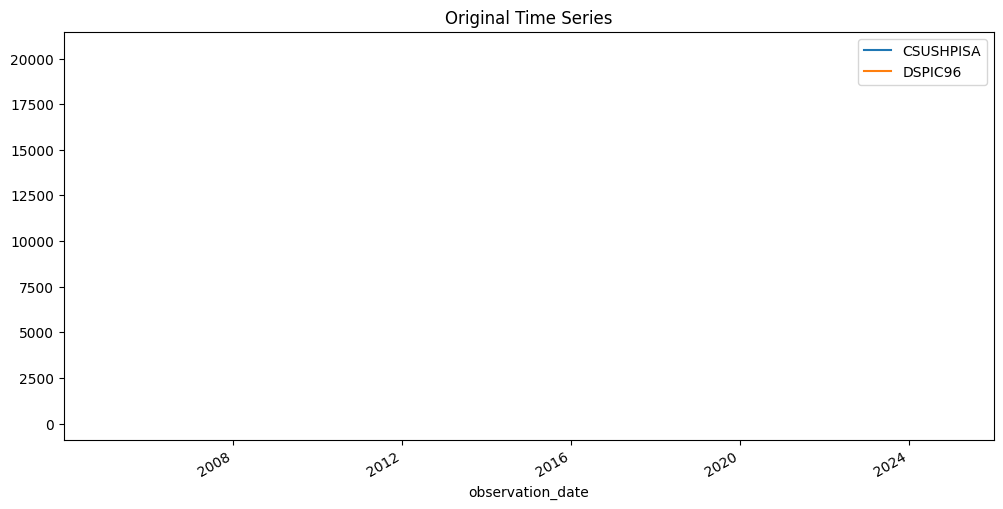

In [131]:
df[['CSUSHPISA', 'DSPIC96']].plot(figsize=(12, 6), title="Original Time Series")


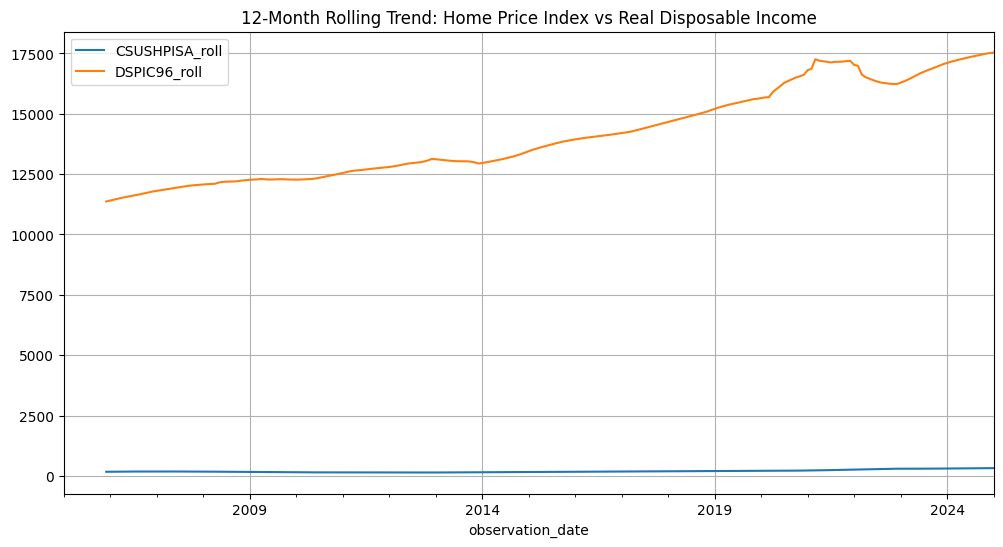

In [132]:
# Make sure data is sorted by date
df = df.sort_values(by='observation_date')

# Drop rows with missing values in the original columns
df = df.dropna(subset=['CSUSHPISA', 'DSPIC96'])

# Apply rolling mean
df['CSUSHPISA_roll'] = df['CSUSHPISA'].rolling(window=12).mean()
df['DSPIC96_roll'] = df['DSPIC96'].rolling(window=12).mean()

# Plot again
df[['CSUSHPISA_roll', 'DSPIC96_roll']].plot(figsize=(12, 6))
plt.title('12-Month Rolling Trend: Home Price Index vs Real Disposable Income')
plt.grid(True)
plt.show()


In [133]:
df

,CPIAUCNS,CSUSHPISA,MORTGAGE30US,Mortgage Rate,DSPIC96,FEDFUNDS,HOUST,UNRATE,FEDFUNDS_lag3,FEDFUNDS_lag6,Mortgage Rate_lag3,Mortgage Rate_lag6,CSUSHPISA_roll,DSPIC96_roll
observation_date,,,,,,,,,,,,,,
2005-01-01,190.700,161.289,NaN,5.7100,11226.5,2.28,2144.0,5.3,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-01,191.800,163.346,NaN,5.6275,11229.0,2.50,2207.0,5.4,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-01,193.300,165.814,NaN,5.9280,11268.8,2.63,1864.0,5.2,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-01,194.600,167.503,NaN,5.8550,11304.2,2.79,2061.0,5.2,NaN,2.63,NaN,5.928,NaN,NaN
2005-05-01,194.400,169.352,NaN,5.7200,11352.7,3.00,2025.0,5.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,315.301,323.311,NaN,6.1800,17519.6,5.13,1355.0,4.1,NaN,NaN,NaN,NaN,318.488667,17417.991667
2024-10-01,315.664,324.491,NaN,6.4280,17568.5,4.83,1344.0,4.1,NaN,NaN,NaN,NaN,319.424667,17452.633333
2024-11-01,315.493,326.013,NaN,6.8050,17592.4,4.64,1305.0,4.2,NaN,4.83,NaN,6.428,320.405500,17482.883333


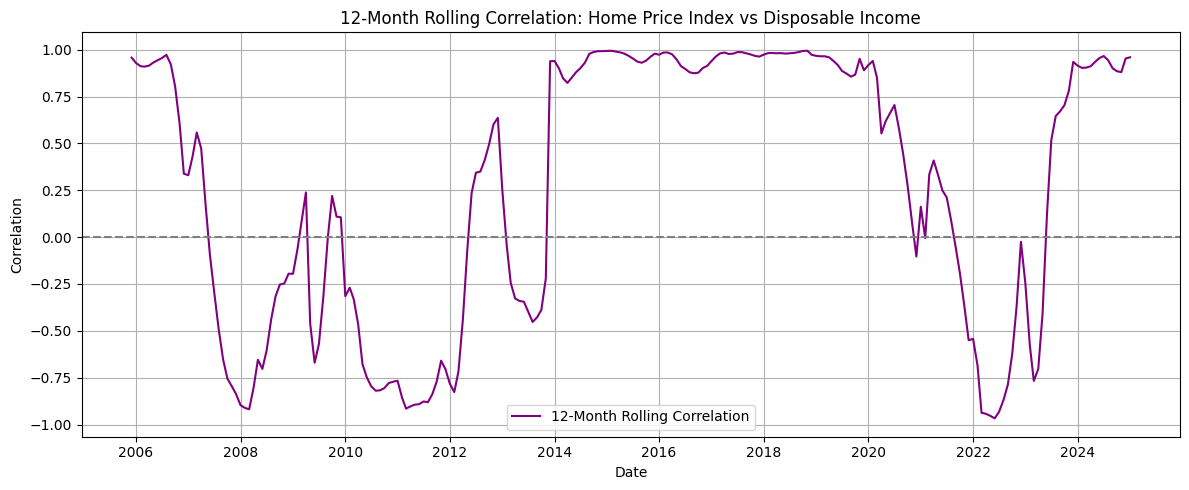

In [106]:
import matplotlib.pyplot as plt

# Calculate 12-month rolling correlation
rolling_corr = df['CSUSHPISA'].rolling(window=12).corr(df['DSPIC96'])

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df.index, rolling_corr, label='12-Month Rolling Correlation', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title('12-Month Rolling Correlation: Home Price Index vs Disposable Income')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 📊 Rolling Correlation Analysis: Home Price Index vs Disposable Income

We calculated a **12-month rolling correlation** between the **S&P/Case-Shiller U.S. National Home Price Index (CSUSHPISA)** and **Real Disposable Income (DSPIC96)** to observe how their relationship has evolved over the past two decades.

### 🔍 Key Insights:

- **2007–2009 (Financial Crisis):**
  - Sharp drop in correlation, turning **strongly negative**, indicating that while disposable income may have held or dropped modestly, housing prices plummeted.
  
- **2014–2020:**
  - **Strong positive correlation**, nearly close to 1.0, suggesting income and home prices were moving in tandem—likely due to stable economic recovery and policy support.

- **2021–2023 (Pandemic & Rate Hikes):**
  - Correlation became **volatile and dipped**, possibly due to:
    - Housing price surges from low interest rates.
    - Income fluctuations and inflation pressures.
    - Fed rate hikes in 2022–2023.

- **Post-2023:**
  - Correlation climbs back toward **strong positive**, hinting at re-alignment of housing and income trends.

---

In [117]:
merged_data

,CPIAUCNS,CSUSHPISA,DSPIC96,FEDFUNDS,HOUST,UNRATE
observation_date,,,,,,
2005-01-01,190.700,161.289,11226.5,2.28,2144,5.3
2005-02-01,191.800,163.346,11229.0,2.50,2207,5.4
2005-03-01,193.300,165.814,11268.8,2.63,1864,5.2
2005-04-01,194.600,167.503,11304.2,2.79,2061,5.2
2005-05-01,194.400,169.352,11352.7,3.00,2025,5.1
...,...,...,...,...,...,...
2024-09-01,315.301,323.311,17519.6,5.13,1355,4.1
2024-10-01,315.664,324.491,17568.5,4.83,1344,4.1
2024-11-01,315.493,326.013,17592.4,4.64,1305,4.2


In [120]:
df = pd.read_csv('data/MORTGAGE30US_MONTHLY.csv', index_col='observation_date', parse_dates=True)
df

,Mortgage Rate
observation_date,
2005-01-01,5.7100
2005-02-01,5.6275
2005-03-01,5.9280
2005-04-01,5.8550
2005-05-01,5.7200
...,...
2024-09-01,6.1800
2024-10-01,6.4280
2024-11-01,6.8050


In [121]:
# merge with existing data
merged_data = merged_data.merge(df, left_index=True, right_index=True, how='outer')
merged_data

,CPIAUCNS,CSUSHPISA,DSPIC96,FEDFUNDS,HOUST,UNRATE,Mortgage Rate
observation_date,,,,,,,
2005-01-01,190.700,161.289,11226.5,2.28,2144,5.3,5.7100
2005-02-01,191.800,163.346,11229.0,2.50,2207,5.4,5.6275
2005-03-01,193.300,165.814,11268.8,2.63,1864,5.2,5.9280
2005-04-01,194.600,167.503,11304.2,2.79,2061,5.2,5.8550
2005-05-01,194.400,169.352,11352.7,3.00,2025,5.1,5.7200
...,...,...,...,...,...,...,...
2024-09-01,315.301,323.311,17519.6,5.13,1355,4.1,6.1800
2024-10-01,315.664,324.491,17568.5,4.83,1344,4.1,6.4280
2024-11-01,315.493,326.013,17592.4,4.64,1305,4.2,6.8050


In [122]:
merged_data.to_csv('data/df_home_prices.csv', index=True)

In [123]:
df = pd.read_csv('data/df_home_prices.csv', index_col='observation_date', parse_dates=True)
df.head()

,CPIAUCNS,CSUSHPISA,DSPIC96,FEDFUNDS,HOUST,UNRATE,Mortgage Rate
observation_date,,,,,,,
2005-01-01,190.7,161.289,11226.5,2.28,2144,5.3,5.7100
2005-02-01,191.8,163.346,11229.0,2.50,2207,5.4,5.6275
2005-03-01,193.3,165.814,11268.8,2.63,1864,5.2,5.9280
2005-04-01,194.6,167.503,11304.2,2.79,2061,5.2,5.8550
2005-05-01,194.4,169.352,11352.7,3.00,2025,5.1,5.7200


In [124]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataframe (already read in earlier context)
# df_path = "/mnt/data/image.png"  # Overwritten earlier with DataFrame CSV, not an image
df = pd.read_csv("data/df_home_prices.csv", index_col="observation_date", parse_dates=True)

# Drop columns with all NaNs
df.dropna(axis=1, how='all', inplace=True)

# Drop rows with any NaNs for modeling
df_clean = df.dropna()

# --- PART 1: Model with main economic indicators ---
features_main = ['DSPIC96', 'Mortgage Rate', 'UNRATE', 'CPIAUCNS', 'FEDFUNDS']
target = 'CSUSHPISA'

X_main = df_clean[features_main]
y_main = df_clean[target]

# Scale features
scaler_main = StandardScaler()
X_main_scaled = scaler_main.fit_transform(X_main)

# Train-test split
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X_main_scaled, y_main, test_size=0.2, random_state=42)

# Train model
model_main = LinearRegression()
model_main.fit(X_train_main, y_train_main)

# Predict and evaluate
y_pred_main = model_main.predict(X_test_main)
metrics_main = {
    "R2 Score": r2_score(y_test_main, y_pred_main),
    "MAE": mean_absolute_error(y_test_main, y_pred_main),
    "MSE": mean_squared_error(y_test_main, y_pred_main)
}

# --- PART 2: Model with lag features too ---
lag_features = [col for col in df_clean.columns if 'lag' in col]
features_all = features_main + lag_features

X_all = df_clean[features_all]
y_all = df_clean[target]

# Scale
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all)

# Split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_scaled, y_all, test_size=0.2, random_state=42)

# Train
model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)

# Predict & evaluate
y_pred_all = model_all.predict(X_test_all)
metrics_all = {
    "R2 Score": r2_score(y_test_all, y_pred_all),
    "MAE": mean_absolute_error(y_test_all, y_pred_all),
    "MSE": mean_squared_error(y_test_all, y_pred_all)
}

# Output both sets of metrics
metrics_main, metrics_all, model_main.coef_, model_all.coef_, features_main, features_all


({'R2 Score': 0.9255157774499212,
  'MAE': 11.678638678283628,
  'MSE': 255.28450938422793},
 {'R2 Score': 0.9255157774499212,
  'MAE': 11.678638678283628,
  'MSE': 255.28450938422793},
 array([31.20039012, 12.90482525, -6.34788594, 16.01562031,  6.17304481]),
 array([31.20039012, 12.90482525, -6.34788594, 16.01562031,  6.17304481]),
 ['DSPIC96', 'Mortgage Rate', 'UNRATE', 'CPIAUCNS', 'FEDFUNDS'],
 ['DSPIC96', 'Mortgage Rate', 'UNRATE', 'CPIAUCNS', 'FEDFUNDS'])

In [137]:
df.shape

(0, 14)

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming df is already loaded and cleaned with proper datetime index
df = df.dropna()  # Drop rows with NaNs due to lag

# Feature selection
features = [
    'DSPIC96_lag3', 'DSPIC96_lag6',
    'Mortgage Rate_lag3', 'Mortgage Rate_lag6',
    'FEDFUNDS_lag3', 'FEDFUNDS_lag6',
    'CPIAUCNS', 'UNRATE'
]
target = 'CSUSHPISA'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Feature importance
coeffs = pd.Series(model.coef_, index=features)

print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("\nFeature Importances:")
print(coeffs.sort_values(ascending=False))


KeyError: "['DSPIC96_lag3', 'DSPIC96_lag6'] not in index"